In [51]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [52]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
dtree = tree.DecisionTreeClassifier()  
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
#the accuracy
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


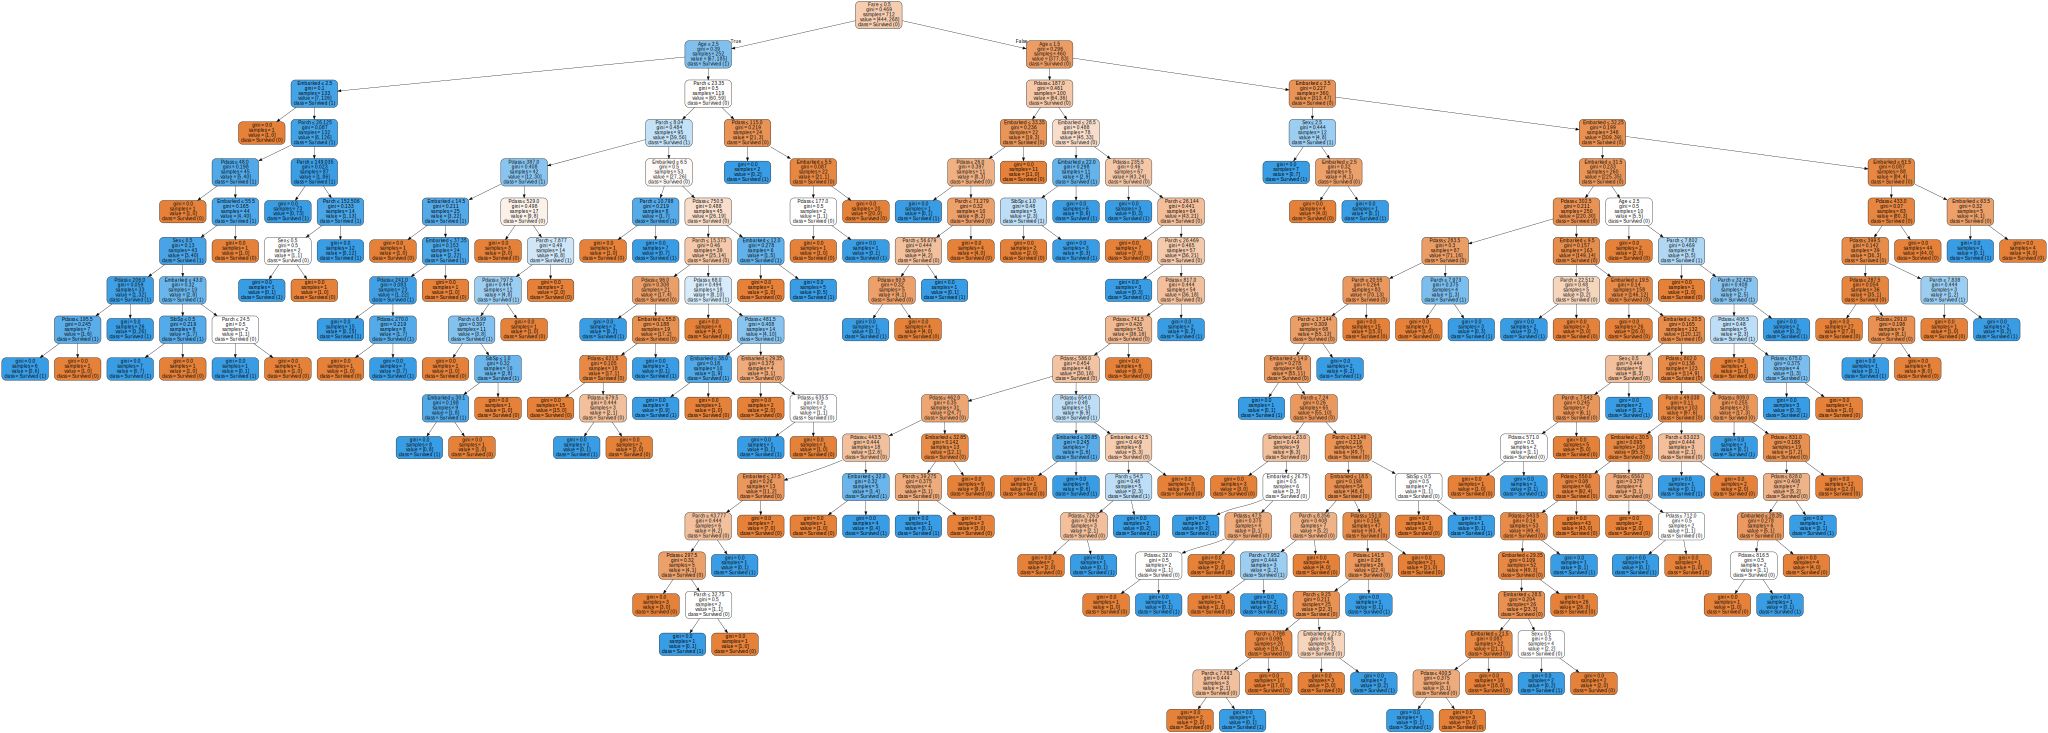

In [54]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, 
                       feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch'],
                       class_names = ['Survived (0)', 'Survived (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [55]:
#applying tree algorithm
d_tree = tree.DecisionTreeClassifier(random_state=40,max_depth=4)  
d_tree.fit(x_train, y_train)   #fitting our model
y_pred=d_tree.predict(x_test)   # evaluating our model
#calculate the new accuracy
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


#the result of the new accuracy after changing the prameters is greater than the previous result

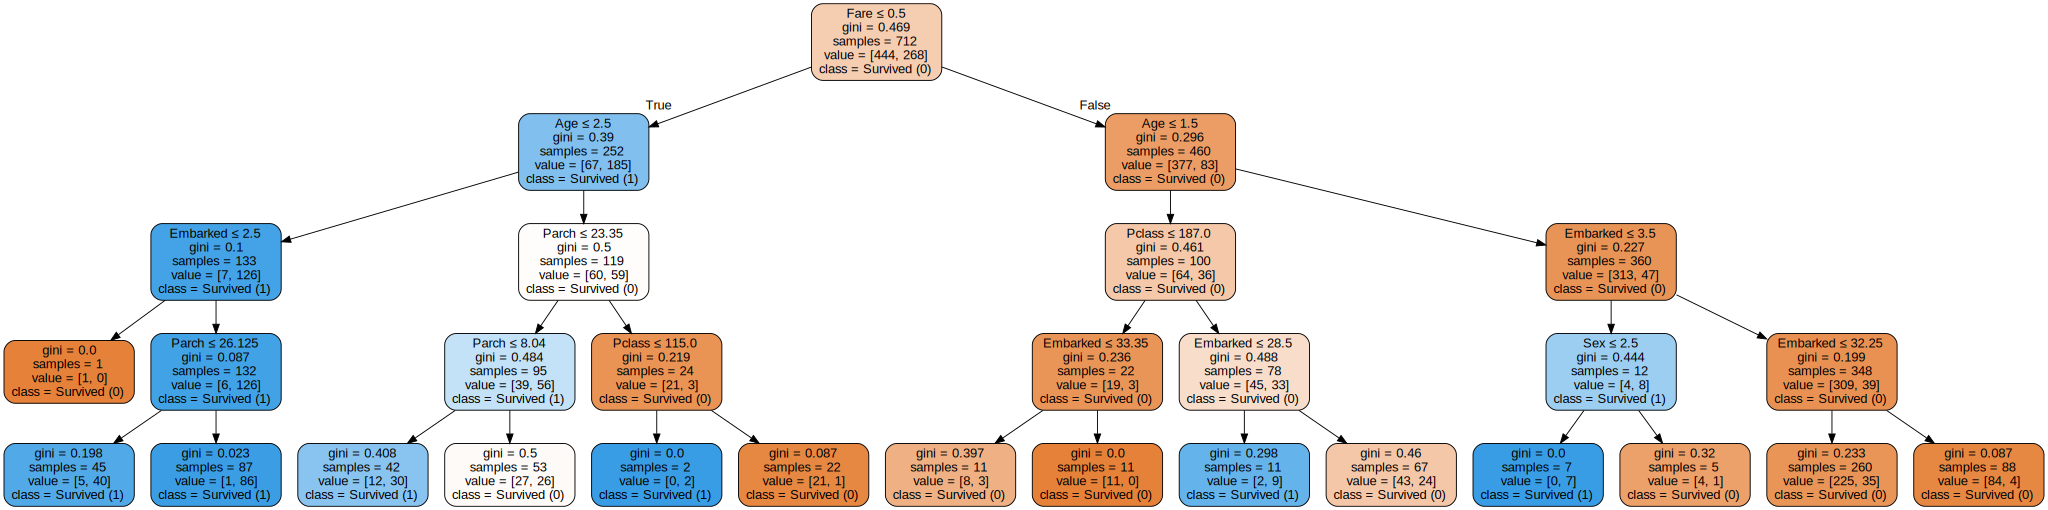

In [56]:
dot_data = tree.export_graphviz(d_tree, out_file=None, 
                       feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch'],
                       class_names = ['Survived (0)', 'Survived (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree
graph = graphviz.Source(dot_data)
graph.render("data1")
graph


# RANDOM Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [58]:
#number of estimators is 10
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006


In [59]:
#number of estimators is 100
clf=RandomForestClassifier(n_estimators=100)  
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8659217877094972


As we can see, the accuracy of random greater than decision tree